In [1]:
from util import *
import numpy as np

In [2]:
def scl(s,v):
    """return s*v where is a scalar and v is a sparse vector"""
    return {key:s*val for key,val in v.items()}

# Problem 1

In [3]:
reviews = [
            "pretty bad",
            "good plot",
            "not good",
            "pretty scenery",
          ]

def phi(review):
    """Returns sparse feature vector from review"""
    return {word:1 for word in review.split()}

xs = list(map(phi,reviews))
ys = [-1.,1.,-1.,1.] # ground truth

xs

[{'pretty': 1, 'bad': 1},
 {'good': 1, 'plot': 1},
 {'not': 1, 'good': 1},
 {'pretty': 1, 'scenery': 1}]

In [4]:
def loss_hinge(x,y,w):
    return max(0,1-y * dotProduct(w,x))

def training_loss(xs,ys,w):
    return np.array([loss_hinge(x,y,w) for x,y in zip(xs,ys)]).mean()

def loss_hinge_grad(x,y,w):
    if 1 - (y*dotProduct(w,x)) <= 0 : return scl(0,x)
    else: return scl(-y,x)

In [5]:
eta = 0.5
w = {}
for x,y in zip(xs,ys):
    print("w: {}, training loss: {}".format(w, training_loss(xs,ys,w)))
    increment(w, -eta, loss_hinge_grad(x,y,w))
print("w: {}, training loss: {}".format(w, training_loss(xs,ys,w)))

w: {}, training loss: 1.0
w: {'pretty': -0.5, 'bad': -0.5}, training loss: 0.875
w: {'pretty': -0.5, 'bad': -0.5, 'good': 0.5, 'plot': 0.5}, training loss: 0.75
w: {'pretty': -0.5, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5}, training loss: 0.625
w: {'pretty': 0.0, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5, 'scenery': 0.5}, training loss: 0.5


That last vector is the answer to problem 1e.

It is possible to reach training loss 0:

In [6]:
eta = 0.5
w = {}
for _ in range(3):
    for x,y in zip(xs,ys):
        print("w: {}, training loss: {}".format(w, training_loss(xs,ys,w)))
        increment(w, -eta, loss_hinge_grad(x,y,w))
print("w: {}, training loss: {}".format(w, training_loss(xs,ys,w)))

w: {}, training loss: 1.0
w: {'pretty': -0.5, 'bad': -0.5}, training loss: 0.875
w: {'pretty': -0.5, 'bad': -0.5, 'good': 0.5, 'plot': 0.5}, training loss: 0.75
w: {'pretty': -0.5, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5}, training loss: 0.625
w: {'pretty': 0.0, 'bad': -0.5, 'good': 0.0, 'plot': 0.5, 'not': -0.5, 'scenery': 0.5}, training loss: 0.5
w: {'pretty': -0.5, 'bad': -1.0, 'good': 0.0, 'plot': 0.5, 'not': -0.5, 'scenery': 0.5}, training loss: 0.5
w: {'pretty': -0.5, 'bad': -1.0, 'good': 0.5, 'plot': 1.0, 'not': -0.5, 'scenery': 0.5}, training loss: 0.5
w: {'pretty': -0.5, 'bad': -1.0, 'good': 0.0, 'plot': 1.0, 'not': -1.0, 'scenery': 0.5}, training loss: 0.25
w: {'pretty': 0.0, 'bad': -1.0, 'good': 0.0, 'plot': 1.0, 'not': -1.0, 'scenery': 1.0}, training loss: 0.0
w: {'pretty': 0.0, 'bad': -1.0, 'good': 0.0, 'plot': 1.0, 'not': -1.0, 'scenery': 1.0}, training loss: 0.0
w: {'pretty': 0.0, 'bad': -1.0, 'good': 0.0, 'plot': 1.0, 'not': -1.0, 'scenery': 1.0}, training lo

## Problem 1f

Suppose we had a dataset consisting of the reviews
- $r_1 = $"good"
- $r_2=$"not good"
- $r_3=$"bad"
- $r_4=$"not bad"

The ground truth about these reviews is obvious: $[+1,-1,-1,+1]$
(where $+1$ means it's a positive review and $-1$ means negative review).

Then the feature space of word counts has dimension 3, if we say
$$ \phi([\text{a review}]) = 
\left[
\begin{array}{c}
\text{number of occurances of "not"}\\
\text{number of occurances of "good"}\\
\text{number of occurances of "bad"}
\end{array}
\right]$$

**Claim:** It is impossible for a linear classifier to get zero error on the dataset above.

_Proof:_ Suppose we had a linear classifier given by weight vector
$w$, and that it gets zero error on the training set above. Remember that the prediction
for input review $r$ would be $\operatorname{sign}(w\cdot\phi(r))$.
Then we'd have
- $w_2 > 0$
- $w_1 + w_2 < 0$
- $w_3<0$
- $w_1+w_3>0$

From the first two we have
$$ w_1 < -w_2 < 0, $$
and from the last two we have
$$ w_1 > -w_3 > 0, $$
a contradiction. $\square$

# Problem 2

(To cut down on notation I write $x$ where I should really write $\phi(x)$)

(a)
$\text{Loss}(x,y,w)=(\sigma(w\cdot x) - y)^2$

(b)
$\nabla_w \text{Loss} = 2(\sigma(w\cdot x)-y)\sigma(w\cdot x)(1-\sigma(w\cdot x)) x$

or if we write $p=\sigma(w\cdot x)$ then it's
$\nabla_w \text{Loss} = 2(p-y)p(1-p) x$

(c) Suppose we make the vector $w$ be $\frac{\alpha}{||x||^2} x $, where $\alpha$ is a very large positive number.
Then $w\cdot x$ is $\alpha$ and so $p= \sigma(w\cdot x) = \sigma(\alpha)\approx 1$. If $y$ is $\pm 1$ then this makes $\nabla_w \text{Loss}$ very close to $0$. This is the vanishing gradient problem.

(d) Assume $y$ is $1$. Then
$$
\begin{align*}
|| \nabla_w \text{Loss} || 
&= 2 |(p-1)p(1-p)|  \, ||x||\\
&= 2 p (1-p)^2  \, ||x||
\end{align*}
$$
Using basic calculus to optimize $p (1-p)^2$ over the domain $p\in (0,1)$ (i.e. the range of the sigmoid),
we get $p=\frac{1}{3}$ as the maximizing value. There certainly exists $w$ that makes $\sigma(w\cdot x)$ be $\frac{1}{3}$. Hence the best bound we can get is
$$
\begin{align*}
|| \nabla_w \text{Loss} || 
&\leq 2 \frac{1}{3} (1-\frac{1}{3})^2  \, ||x||\\
&=\frac{8}{27}||x||
\end{align*}
$$

(e) Set $y_n'=\sigma^{-1}(y_n)$ and choose $w^*=w$... if I understood the problem correctly.

# Problem 3

In [7]:
# Problem 3a: feature extraction

def extractWordFeatures(x):
    """
    Extract word features for a string x. Words are delimited by
    whitespace characters only.
    @param string x: 
    @return dict: feature vector representation of x.
    Example: "I am what I am" --> {'I': 2, 'am': 2, 'what': 1}
    """
    # BEGIN_YOUR_CODE (our solution is 4 lines of code, but don't worry if you deviate from this)
    words = x.split()
    return {word:len(list(filter(lambda w:w==word,words))) for word in words}
    # END_YOUR_CODE


In [8]:
extractWordFeatures("I am what I am")

{'I': 2, 'am': 2, 'what': 1}

In [9]:
############################################################
# Problem 3b: stochastic gradient descent

def learnPredictor(trainExamples, testExamples, featureExtractor, numIters, eta):
    '''
    Given |trainExamples| and |testExamples| (each one is a list of (x,y)
    pairs), a |featureExtractor| to apply to x, and the number of iterations to
    train |numIters|, the step size |eta|, return the weight vector (sparse
    feature vector) learned.

    You should implement stochastic gradient descent.

    Note: only use the trainExamples for training!
    You should call evaluatePredictor() on both trainExamples and testExamples
    to see how you're doing as you learn after each iteration.
    '''
    weights = {}  # feature => weight
    # BEGIN_YOUR_CODE (our solution is 12 lines of code, but don't worry if you deviate from this)
    def loss_hinge(x,y,w):
        return max(0,1-y * dotProduct(w,x))

    def ave_loss(data,w):
        return np.array([loss_hinge(x,y,w) for x,y in data]).mean()

    def error_rate(data,w):
        return sum(int(dotProduct(w,x)*y <= 0) for x,y in data)/float(len(data))
    
    def loss_hinge_grad(x,y,w):
        if 1 - (y*dotProduct(w,x)) <= 0 : return scl(0,x)
        else: return scl(-y,x)

    trainExamplesF = np.array([[featureExtractor(x),y] for x,y in trainExamples])
    testExamplesF = np.array([[featureExtractor(x),y] for x,y in testExamples])
        
    for i in range(numIters):
        print("Iteration {}:\n\tTraining loss:\t{}\n\tTest loss:\t{}\n\tTraining error rate:\t{}\n\tTest error rate:\t{}".format(
            i,
            ave_loss(trainExamplesF,weights),
            ave_loss(testExamplesF,weights),
            error_rate(trainExamplesF,weights),
            error_rate(testExamplesF,weights)
        ))
        for x,y in trainExamplesF:
            increment(weights,-eta,loss_hinge_grad(x,y,weights))
    # END_YOUR_CODE
    return weights


In [10]:
train =   [
            ["pretty bad", -1],
            ["good plot", 1],
            ["not good", -1],
            ["pretty scenery", 1],
            ["decent camera work", 1],
            ["horrible camera shaking", -1],
            ["not a good movie", -1],
            ["best movie ever", 1],
            ["not the best movie", -1],
            ["great acting", 1],
            ["horrible film", -1],
          ]

test =    [
            ["scenery was good", 1],
            ["plot is decent", 1],
            ["worst movie ever", -1],
            ["too much camera shaking", -1],
            ["best movie",1],
          ]

w = learnPredictor(train, test, extractWordFeatures, 10, 0.05)
w

Iteration 0:
	Training loss:	1.0
	Test loss:	1.0
	Training error rate:	1.0
	Test error rate:	1.0
Iteration 1:
	Training loss:	0.8772727272727273
	Test loss:	0.9799999999999999
	Training error rate:	0.18181818181818182
	Test error rate:	0.6
Iteration 2:
	Training loss:	0.7545454545454544
	Test loss:	0.96
	Training error rate:	0.18181818181818182
	Test error rate:	0.6
Iteration 3:
	Training loss:	0.6318181818181818
	Test loss:	0.9400000000000001
	Training error rate:	0.18181818181818182
	Test error rate:	0.6
Iteration 4:
	Training loss:	0.5272727272727272
	Test loss:	0.9200000000000002
	Training error rate:	0.18181818181818182
	Test error rate:	0.6
Iteration 5:
	Training loss:	0.45454545454545453
	Test loss:	0.89
	Training error rate:	0.0
	Test error rate:	0.4
Iteration 6:
	Training loss:	0.3772727272727273
	Test loss:	0.85
	Training error rate:	0.0
	Test error rate:	0.4
Iteration 7:
	Training loss:	0.30909090909090914
	Test loss:	0.8100000000000002
	Training error rate:	0.0
	Test error 

{'pretty': 0.0,
 'bad': -0.49999999999999994,
 'good': -0.10000000000000002,
 'plot': 0.49999999999999994,
 'not': -0.9000000000000002,
 'scenery': 0.49999999999999994,
 'decent': 0.49999999999999994,
 'camera': 0.1,
 'work': 0.49999999999999994,
 'horrible': -0.7500000000000001,
 'shaking': -0.39999999999999997,
 'a': -0.2,
 'movie': -1.3877787807814457e-17,
 'best': 0.2,
 'ever': 0.49999999999999994,
 'the': -0.3,
 'great': 0.49999999999999994,
 'acting': 0.49999999999999994,
 'film': -0.35}

In [11]:
def generateDataset(numExamples, weights):
    '''
    Return a set of examples (phi(x), y) randomly which are classified correctly by
    |weights|.
    '''
    random.seed(42)
    # Return a single example (phi(x), y).
    # phi(x) should be a dict whose keys are a subset of the keys in weights
    # and values can be anything (randomize!) with a nonzero score under the given weight vector.
    # y should be 1 or -1 as classified by the weight vector.
    def generateExample():
        # BEGIN_YOUR_CODE (our solution is 2 lines of code, but don't worry if you deviate from this)
        keys = random.sample(weights.keys(),random.randint(1,len(weights.keys())))
        phi = {k:abs(int(random.gauss(0,2)))+1 for k in keys}
        y = 1 if dotProduct(weights,phi) > 0 else -1
        # END_YOUR_CODE
        return (phi, y)
    return [generateExample() for _ in range(numExamples)]


In [12]:
generateDataset(3,w)

[({'pretty': 1, 'work': 1, 'camera': 1, 'great': 3}, 1),
 ({'best': 1,
   'bad': 1,
   'pretty': 2,
   'good': 1,
   'plot': 1,
   'ever': 1,
   'work': 2,
   'horrible': 3,
   'great': 2,
   'movie': 4,
   'film': 6,
   'decent': 2,
   'acting': 2,
   'a': 2,
   'not': 2,
   'the': 3,
   'shaking': 2,
   'scenery': 3,
   'camera': 1},
  -1),
 ({'horrible': 1,
   'good': 1,
   'camera': 2,
   'plot': 2,
   'decent': 3,
   'not': 1,
   'great': 3,
   'shaking': 3},
  1)]

## Problem 3d

A lot of the misclassifications are not handling negation properly, so it may help the classifier to know more about the word order. Maybe the classifier can focus on pairs of words rather than individual words.

Also a lot of weight sometimes weirdly ends up on commonly used prepositions that intuitively shouldn't have positive or negative connotations. It may help to find the words that are most shared along all reviews and prune these before training begins.

In [13]:
# Problem 3e: character features

def extractCharacterFeatures(n):
    '''
    Return a function that takes a string |x| and returns a sparse feature
    vector consisting of all n-grams of |x| without spaces mapped to their n-gram counts.
    EXAMPLE: (n = 3) "I like tacos" --> {'Ili': 1, 'lik': 1, 'ike': 1, ...
    You may assume that n >= 1.
    '''
    def extract(x):
        # BEGIN_YOUR_CODE (our solution is 6 lines of code, but don't worry if you deviate from this)
        x_nospace = ''.join(c for c in x if c not in [' ','\t'])
        w = {}
        for i in range(len(x_nospace)-(n-1)):
            if x_nospace[i:i+n] in w.keys():
                w[x_nospace[i:i+n]] += 1
            else:
                w[x_nospace[i:i+n]] = 1
        return w
        # END_YOUR_CODE
    return extract


In [14]:
extractCharacterFeatures(3)("I tacalike tacososos")

{'Ita': 1,
 'tac': 2,
 'aca': 1,
 'cal': 1,
 'ali': 1,
 'lik': 1,
 'ike': 1,
 'ket': 1,
 'eta': 1,
 'aco': 1,
 'cos': 1,
 'oso': 2,
 'sos': 2}

In [15]:
# Problem 3f

w = learnPredictor(train, test, extractCharacterFeatures(2), 5, 0.1)

Iteration 0:
	Training loss:	1.0
	Test loss:	1.0
	Training error rate:	1.0
	Test error rate:	1.0
Iteration 1:
	Training loss:	0.29090909090909095
	Test loss:	0.78
	Training error rate:	0.09090909090909091
	Test error rate:	0.4
Iteration 2:
	Training loss:	0.1636363636363636
	Test loss:	0.8
	Training error rate:	0.09090909090909091
	Test error rate:	0.6
Iteration 3:
	Training loss:	0.06363636363636363
	Test loss:	0.86
	Training error rate:	0.0
	Test error rate:	0.4
Iteration 4:
	Training loss:	0.03636363636363637
	Test loss:	0.8600000000000001
	Training error rate:	0.0
	Test error rate:	0.4


In [16]:
def print_weights(weights):
    print("%d weights" % len(weights))
    for f, v in sorted(list(weights.items()), key=lambda f_v : -f_v[1]):
        print('\t'.join([f, str(v)]))


trainExamples = readExamples('polarity.train')
devExamples = readExamples('polarity.dev')
w_words = learnPredictor(trainExamples, devExamples, extractWordFeatures, 20, 0.05)
print_weights(w_words)

Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Iteration 0:
	Training loss:	1.0
	Test loss:	1.0
	Training error rate:	1.0
	Test error rate:	1.0
Iteration 1:
	Training loss:	0.5350872256612269
	Test loss:	0.7742543612830616
	Training error rate:	0.21722003376477209
	Test error rate:	0.33595948227349465
Iteration 2:
	Training loss:	0.3788407428249861
	Test loss:	0.7160523353967362
	Training error rate:	0.14715813168261113
	Test error rate:	0.30782217220033764
Iteration 3:
	Training loss:	0.33435565559932473
	Test loss:	0.7418964546989307
	Training error rate:	0.12380416432189083
	Test error rate:	0.31035453010692177
Iteration 4:
	Training loss:	0.22426842993809798
	Test loss:	0.6761536297129995
	Training error rate:	0.0742824985931345
	Test error rate:	0.2858750703432752
Iteration 5:
	Training loss:	0.25016882386043865
	Test loss:	0.7273776027011816
	Training error rate:	0.09172763083849184
	Test error rate:	0.3007878446820484
Iteration 6:
	Training loss:	0.1

opera's	0.7000000000000001
neglected	0.7000000000000001
delight	0.7000000000000001
smarter	0.7000000000000001
move	0.7000000000000001
educational	0.7000000000000001
fairy-tale	0.7000000000000001
brings	0.7000000000000001
language	0.7000000000000001
[an]	0.7000000000000001
behold	0.7000000000000001
and--especially--to	0.7000000000000001
ability	0.7000000000000001
caved	0.7000000000000001
format	0.7000000000000001
helps	0.7000000000000001
heartfelt	0.7000000000000001
catch	0.7000000000000001
national	0.7000000000000001
committed	0.7000000000000001
huge	0.7000000000000001
undoubtedly	0.7000000000000001
keeping	0.7000000000000001
twice	0.7000000000000001
traditional	0.7000000000000001
stone	0.7000000000000001
grateful	0.7000000000000001
accurate	0.7000000000000001
demented	0.7000000000000001
confident	0.7000000000000001
incarnates	0.7000000000000001
prophetic	0.7000000000000001
exacting	0.7000000000000001
shrugging	0.7
way	0.6999999999999998
most	0.6500000000000002
that's	0.650000000000000

[binoche	0.2
magimel]	0.2
angst-ridden	0.2
judges	0.2
overcook	0.2
hysteria	0.2
julianne	0.2
rating	0.2
over-dramatic	0.2
película	0.2
oscura	0.2
precisa	0.2
grandiosa	0.2
casi	0.2
siempre	0.2
conmovedora	0.2
cq's	0.2
cinema-and-self	0.2
crit	0.2
german	0.2
centering	0.2
columbus	0.2
capturou	0.2
pomo	0.2
ouro	0.2
backstory	0.2
alain	0.2
choquart's	0.2
portraying	0.2
turmoil	0.2
unspool	0.2
safely	0.2
video/dvd	0.2
babysitter	0.2
unbridled	0.2
greed	0.2
materalism	0.2
miraculously	0.2
mechanisms	0.2
unfolding	0.2
ming-liang's	0.2
not-being	0.2
all-powerful	0.2
pop-cyber	0.2
feeds	0.2
bjorkness	0.2
hallelujah	0.2
harsh	0.2
englishmen	0.2
mortality	0.2
views	0.2
affluence	0.2
ideal	0.2
coping	0.2
life's	0.2
endgame	0.2
side-splittingly	0.2
legally	0.2
blonde	0.2
piper	0.2
perabo	0.2
chalk	0.2
adoration	0.2
myriad	0.2
long-lived	0.2
lose	0.2
fanciful	0.2
fanatical	0.2
squeezed	0.2
idealism	0.2
godfrey	0.2
melted	0.2
astonish	0.2
stevens'	0.2
dolls	0.2
connoisseurs	0.2
pleased	0.2
tian's	0

du	0.0
sarcasm	0.0
service	0.0
skit-com	0.0
fervently	0.0
deposited	0.0
scuttled	0.0
register	0.0
ploy	0.0
develop	0.0
brazen	0.0
stinker	0.0
decided	0.0
arcane	0.0
exposure	0.0
transporting	0.0
focused	0.0
nations	0.0
whom	0.0
pin	0.0
ransacked	0.0
ponder	0.0
restatement	0.0
validated	0.0
asphalt	0.0
figuring	0.0
prescribed	0.0
dentist's	0.0
soothing	0.0
muzak	0.0
cushion	0.0
divorce	0.0
earthly	0.0
actor	0.0
stoop	0.0
subtlest	0.0
space	0.0
sustains	0.0
honey	0.0
clams	0.0
broiling	0.0
non-actors	0.0
no-budget	0.0
stinging	0.0
cinta	0.0
pues	0.0
chinese	0.0
beresford	0.0
mixes	0.0
'evelyn	0.0
aptly	0.0
tearing	0.0
re-assess	0.0
evaluate	0.0
ours	0.0
hot	0.0
adaptation's	0.0
[time	0.0
resources]	0.0
establish	0.0
france's	0.0
workplace	0.0
phillip	0.0
cinematographer	0.0
christopher	0.0
doyle	0.0
forcefulness	0.0
prose	0.0
urge	0.0
shifts	0.0
advice	0.0
ward	0.0
celebrity	0.0
'inside'	0.0
mick	0.0
unturned	0.0
kid's]	0.0
nine-tenths	0.0
post-colonialist	0.0
affirming	0.0
cynicism	0.0


thirty-five	-0.1
inflated	-0.1
kidnapper	-0.1
emphasizing	-0.1
panic	-0.1
witlessness	-0.1
not-so-bright	-0.1
trio	-0.1
criminals	-0.1
falsehoods	-0.1
stifling	-0.1
creator's	-0.1
amiable	-0.1
picture's	-0.1
shine	-0.1
spits	-0.1
washington's	-0.1
truffle	-0.1
[morgan]	-0.1
judd	-0.1
rooted	-0.1
joseph	-0.1
finder	-0.1
opportunism	-0.1
redundant	-0.1
aboul	-0.1
host	-0.1
hostess's	-0.1
baby's	-0.1
birth	-0.1
1934	-0.1
mgm	-0.1
matt	-0.1
residuals	-0.1
officially	-0.1
completes	-0.1
trilogy	-0.1
planned	-0.1
faces'	-0.1
1938	-0.1
misdemeanor	-0.1
blasphemous	-0.1
suburban	-0.1
stripped	-0.1
plods	-0.1
opposing	-0.1
viewpoints	-0.1
toasts	-0.1
spelled	-0.1
<b>want</b>	-0.1
ryder	-0.1
gender-provoking	-0.1
submerged	-0.1
tendency	-0.1
avalanches	-0.1
fuzziness	-0.1
marketable	-0.1
blind	-0.1
unaccountable	-0.1
splitting	-0.1
[w]hile	-0.1
environmentalism	-0.1
goodall's	-0.1
chimpanzees	-0.1
oversize	-0.1
epps	-0.1
affability	-0.1
tucker	-0.1
faking	-0.1
spiteful	-0.1
salvaged	-0.1
kline's

independent	-0.39999999999999997
key	-0.39999999999999997
scary	-0.39999999999999997
kingdom	-0.39999999999999997
animated	-0.39999999999999997
frame	-0.39999999999999997
jackie	-0.39999999999999997
toy	-0.39999999999999997
hem	-0.39999999999999997
hems	-0.39999999999999997
ends	-0.39999999999999997
clichéd	-0.39999999999999997
probably	-0.39999999999999997
kjell	-0.39999999999999997
bjarne	-0.39999999999999997
actions	-0.39999999999999997
naïf's	-0.39999999999999997
wonder	-0.39999999999999997
content	-0.39999999999999997
dire	-0.39999999999999997
saving	-0.39999999999999997
characters'	-0.39999999999999997
disposable	-0.39999999999999997
compendium	-0.39999999999999997
teen-catholic-movie	-0.39999999999999997
requisite	-0.39999999999999997
faux-urban	-0.39999999999999997
vibe	-0.39999999999999997
hotter-two-years-ago	-0.39999999999999997
r&b	-0.39999999999999997
pulp	-0.39999999999999997
cheesy	-0.39999999999999997
grow	-0.39999999999999997
omission	-0.39999999999999997
less-than-com

In [17]:
w_3grams = learnPredictor(trainExamples, devExamples, extractCharacterFeatures(3), 20, 0.05)
print_weights(w_3grams)

Iteration 0:
	Training loss:	1.0
	Test loss:	1.0
	Training error rate:	1.0
	Test error rate:	1.0
Iteration 1:
	Training loss:	0.9223550928531238
	Test loss:	1.5959341586944296
	Training error rate:	0.2563308947664603
	Test error rate:	0.3911086100168824
Iteration 2:
	Training loss:	0.45178671918964564
	Test loss:	1.3072312886888018
	Training error rate:	0.1533483398987057
	Test error rate:	0.3483398987056837
Iteration 3:
	Training loss:	0.24058806978052905
	Test loss:	1.2120005627462016
	Training error rate:	0.09088351153629713
	Test error rate:	0.32667416994935283
Iteration 4:
	Training loss:	0.26328081035453016
	Test loss:	1.3487197523916714
	Training error rate:	0.09904333145751266
	Test error rate:	0.3328643781654474
Iteration 5:
	Training loss:	0.15673888576252112
	Test loss:	1.339687675858188
	Training error rate:	0.062183455261676984
	Test error rate:	0.3280810354530107
Iteration 6:
	Training loss:	0.12184862127180647
	Test loss:	1.3593556555993251
	Training error rate:	0.041080

rtc	0.2
e:h	0.2
eht	0.2
yps	0.2
rg,	0.2
amh	0.2
myf	0.2
l.p	0.2
mru	0.2
oei	0.2
da,	0.2
gnp	0.2
-ed	0.2
f,v	0.2
efn	0.2
ftn	0.2
)su	0.2
yil	0.2
y.t	0.2
ny-	0.2
le:	0.2
:he	0.2
al;	0.2
l;i	0.2
cps	0.2
19:	0.2
9:t	0.2
hé!	0.2
evu	0.2
te(	0.2
e(s	0.2
ee:	0.2
:te	0.2
er!	0.2
r!)	0.2
!),	0.2
s"a	0.2
"he	0.2
st"	0.2
t"s	0.2
"gl	0.2
ry"	0.2
y"a	0.2
"ab	0.2
k,m	0.2
caw	0.2
d.y	0.2
t'd	0.2
r'w	0.2
ot"	0.2
e]i	0.2
]is	0.2
c:t	0.2
vow	0.2
akl	0.2
mii	0.2
iik	0.2
psp	0.2
pe:	0.2
e:i	0.2
:ic	0.2
nkg	0.2
kgo	0.2
fgu	0.2
]wh	0.2
,[s	0.2
de]	0.2
hea	0.19999999999999996
nou	0.19999999999999996
yea	0.19999999999999996
nad	0.19999999999999996
ife	0.19999999999999996
tfo	0.19999999999999996
irl	0.19999999999999996
yse	0.19999999999999996
rou	0.1999999999999999
ade	0.1999999999999999
hei	0.1999999999999999
odf	0.1999999999999999
rth	0.1999999999999998
int	0.199999999999999
est	0.1500000000000007
ing	0.15000000000000066
his	0.15000000000000033
fra	0.1500000000000003
wor	0.15000000000000024
nfa	0.15000000000

?do	0.0
y?i	0.0
?if	0.0
-iv	0.0
a,o	0.0
ipg	0.0
pgl	0.0
cub	0.0
lui	0.0
c's	0.0
nt(	0.0
(ac	0.0
te?	0.0
e?w	0.0
?wh	0.0
s?)	0.0
m-v	0.0
mfy	0.0
fyl	0.0
t'w	0.0
ho?	0.0
o?'	0.0
hy?	0.0
eyv	0.0
-sq	0.0
s-e	0.0
irj	0.0
okf	0.0
n.b	0.0
jae	0.0
ae-	0.0
-eu	0.0
unj	0.0
jeo	0.0
buo	0.0
uoy	0.0
cpa	0.0
pae	0.0
aea	0.0
g-m	0.0
ca1	0.0
958	0.0
58.	0.0
rr.	0.0
d-'	0.0
-'9	0.0
'90	0.0
90s	0.0
axw	0.0
xwa	0.0
:st	0.0
of3	0.0
f3-	0.0
3-d	0.0
-dg	0.0
voy	0.0
utj	0.0
ps:	0.0
s:v	0.0
:ve	0.0
ur'	0.0
rtz	0.0
;ia	0.0
y'i	0.0
ea1	0.0
a12	0.0
12-	0.0
2-s	0.0
amf	0.0
naz	0.0
zi.	0.0
ix,	0.0
elj	0.0
c,p	0.0
m-i	0.0
vyt	0.0
kyg	0.0
ygl	0.0
m.o	0.0
.sh	0.0
s",	0.0
",y	0.0
fj.	0.0
j.m	0.0
.m.	0.0
sut	0.0
st[	0.0
t[i	0.0
]as	0.0
we,	0.0
cwa	0.0
hi.	0.0
tv,	0.0
v,t	0.0
my-	0.0
d'h	0.0
ip'	0.0
p',	0.0
','	0.0
d'r	0.0
liy	0.0
és,	0.0
wo2	0.0
o20	0.0
xwi	0.0
,gu	0.0
éab	0.0
-ob	0.0
on	0.0
no	0.0
on	0.0
ie:	0.0
:ho	0.0
at	0.0
ad	0.0
pyj	0.0
re	0.0
eg	0.0
gr	0.0
d"h	0.0
ptm	0.0
..y	0.0
d(e	0.0
(ev	0.0
)tu	0.0


hhu	-0.10000000000000002
ayb	-0.10000000000000002
enm	-0.10000000000000002
'db	-0.10000000000000002
"su	-0.10000000000000002
h-t	-0.10000000000000002
-pa	-0.10000000000000002
s'u	-0.10000000000000002
t-c	-0.10000000000000002
"fr	-0.10000000000000002
tad	-0.10000000000000002
li'	-0.10000000000000002
ask	-0.10000000000000002
onk	-0.10000000000000002
'sq	-0.10000000000000002
ghb	-0.10000000000000002
h,w	-0.10000000000000002
ah,	-0.10000000000000002
cem	-0.10000000000000002
akd	-0.10000000000000002
kre	-0.10000000000000002
lpu	-0.10000000000000002
,do	-0.10000000000000002
kor	-0.10000000000000002
ts2	-0.10000000000000002
d,d	-0.10000000000000002
ke'	-0.10000000000000002
tsk	-0.10000000000000002
rbp	-0.10000000000000002
s-l	-0.10000000000000002
'ma	-0.10000000000000002
]hi	-0.10000000000000002
ysr	-0.10000000000000002
sye	-0.10000000000000002
ofk	-0.10000000000000002
m,t	-0.10000000000000002
iis	-0.10000000000000002
t-m	-0.10000000000000002
okc	-0.10000000000000002
kha	-0.10000000000000002


sbe	-0.40000000000000047
red	-0.4000000000000006
thi	-0.40000000000000174
ent	-0.40000000000000197
sse	-0.4499999999999998
scr	-0.44999999999999984
lya	-0.44999999999999984
yed	-0.44999999999999984
u'r	-0.44999999999999984
tur	-0.4499999999999999
lds	-0.4499999999999999
ll.	-0.44999999999999996
h.g	-0.44999999999999996
lm-	-0.44999999999999996
hwa	-0.44999999999999996
rti	-0.44999999999999996
ntf	-0.44999999999999996
hhi	-0.44999999999999996
eem	-0.44999999999999996
ymi	-0.44999999999999996
w,a	-0.44999999999999996
,un	-0.44999999999999996
leg	-0.44999999999999996
ary	-0.44999999999999996
rup	-0.44999999999999996
fea	-0.44999999999999996
eit	-0.44999999999999996
oof	-0.44999999999999996
nqu	-0.44999999999999996
apo	-0.44999999999999996
lmm	-0.44999999999999996
pag	-0.44999999999999996
sod	-0.44999999999999996
rap	-0.44999999999999996
cmo	-0.44999999999999996
cyc	-0.44999999999999996
oks	-0.44999999999999996
oom	-0.44999999999999996
upp	-0.44999999999999996
ika	-0.44999999999999996
atp	

Interesting that we can get almost as good results using 3-grams. I think it's because 3 grams are heavily correlated to words. So even though 3-grams (usually) do not have semantic content, they are good predictors for words. 2-grams don't work as well. 1-grams, individual characters, barely work at all.

In [36]:
# Construct a review (one sentence max) in which character n-grams probably outperform word features

# I'd write something that has 3-grams with semantic content, but it's hard to think of such things
# How about a good review with misspelled positive sounding words?

review = "aweesome movie, with sooolid acting and no issues!"
pos_or_neg = 1
print("--- Word features predictor: ---")
verbosePredict(extractWordFeatures(review),pos_or_neg,w_words,sys.stdout)
print("\n--- 3-gram features predictor: ---")
verbosePredict(extractCharacterFeatures(3)(review),pos_or_neg,w_3grams,sys.stdout)

--- Word features predictor: ---
Truth: 1, Prediction: -1 [WRONG]
with                          1 * 0.3499999999999999 = 0.3499999999999999
and                           1 * 0.1000000000000055 = 0.1000000000000055
aweesome                      1 * 0 = 0
movie,                        1 * 0 = 0
sooolid                       1 * 0 = 0
issues!                       1 * 0 = 0
acting                        1 * -0.05000000000000002 = -0.05000000000000002
no                            1 * -0.6500000000000035 = -0.6500000000000035

--- 3-gram features predictor: ---
Truth: 1, Prediction: 1 [CORRECT]
lid                           1 * 1.3500000000000005 = 1.3500000000000005
awe                           1 * 1.0500000000000003 = 1.0500000000000003
mem                           1 * 0.9000000000000006 = 0.9000000000000006
wee                           1 * 0.8500000000000003 = 0.8500000000000003
and                           1 * 0.8000000000000025 = 0.8000000000000025
wit                           1 

1

# Problem 4

## k-means clusetering

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import copy

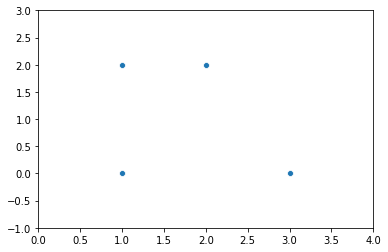

In [107]:
data_4a = np.array([[1,0],[1,2],[3,0],[2,2]])
ax = sns.scatterplot(x=data_4a.T[0], y=data_4a.T[1])
ax.set_xbound(0,4)
ax.set_ybound(-1,3)

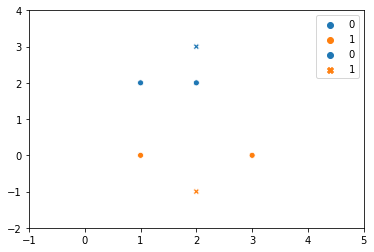

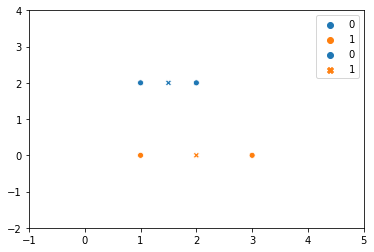

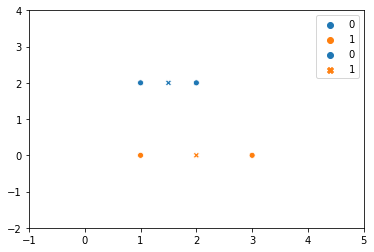

array([[1.5, 2. ],
       [2. , 0. ]])

In [138]:
def nearest(x,centers):
    """Return the index of the center that is closest to x"""
    sqdists = [((x-mu)**2).sum() for mu in centers]
    return sqdists.index(min(sqdists))

def classes(centers,data):
    return list(map(lambda x : nearest(x,centers),data))


def display_clustering(data, centers, ax):
    sns.scatterplot(x=data.T[0], y=data.T[1], hue=classes(centers,data),ax=ax)
    sns.scatterplot(x=centers.T[0], y=centers.T[1], hue=range(len(centers)),style=[1,1],style_order=[0,1])
    ax.set_xbound(data.T[0].min()-2,data.T[0].max()+2)
    ax.set_ybound(data.T[1].min()-2,data.T[1].max()+2)
    plt.show()


def kmeans(num_iterations, initial_centers, data):
    centers = copy.deepcopy(initial_centers)
    display_clustering(data,centers,plt.axes(label=-1))
    for i in range(num_iterations):
        z = classes(centers, data)
        clusters = np.array([[data[n] for n in range(len(data)) if z[n]==j] for j in range(len(centers))])
        centers = np.array([cluster.mean(axis=0) for cluster in clusters])
        ax = plt.axes(label=i)
        display_clustering(data,centers,ax)
    return centers

kmeans(2,
       np.array([[2,3],[2,-1]],dtype="float64"),
       data_4a)

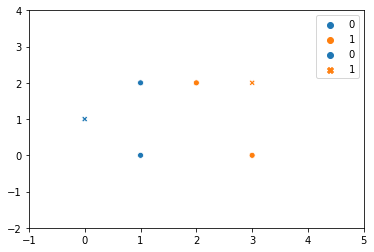

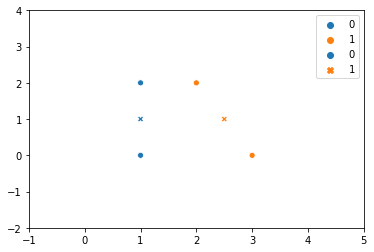

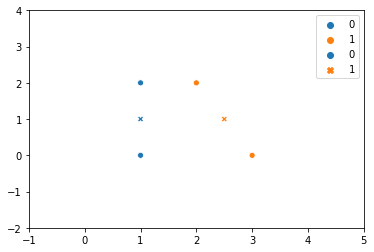

array([[1. , 1. ],
       [2.5, 1. ]])

In [140]:
kmeans(2,
       np.array([[0,1],[3,2]],dtype="float64"),
       data_4a)

In [236]:
def sp_sdist(d1,d2):
    """Returns squared distance between two sparse vectors.
    This was super inefficient to use in the actual calculation so I ended up not us"""
    sdist = 0
    for key,val1 in d1.items():
        sdist += (val1 - d2.get(key, 0))**2
    for key, val2 in d2.items():
        if not key in d1.keys():
            sdist += val2**2
    return sdist

def nearest_index(spvec, centers, center_sq_sums):
    """Return the index of the item in center which is closest to spvec.
    Here spvec is a sparse vector and centers is a list of sparse vectors.
    The object center_sq_sums should be a pre-computed list of squared norms
    of the items in centers."""
    # The following list consists of
    # |spvec - mu|^2 - |spvec|^2  = |mu|^2 - 2 spvec . mu
    # running over all mu in centers
    l = [sqnorm_of_mu - 2 * dotProduct(spvec,mu) for mu,sqnorm_of_mu in zip(centers,center_sq_sums)]
    return l.index(min(l))

def sp_centroid(vs):
    """Returns centroid (as sparse vec) of a list of sparse vectors"""
    c = {}
    for v in vs:
        increment(c,1,v)
    return scl(1/float(len(vs)),c)

def cluster_loss(cluster,center):
    return len(cluster)*dotProduct(center,center) +\
        sum(dotProduct(pt,pt) - 2*dotProduct(pt,center) for pt in cluster)

############################################################
# Problem 4: k-means
############################################################

def kmeans(examples, K, maxIters):
    '''
    examples: list of examples, each example is a string-to-double dict representing a sparse vector.
    K: number of desired clusters. Assume that 0 < K <= |examples|.
    maxIters: maximum number of iterations to run (you should terminate early if the algorithm converges).
    Return: (length K list of cluster centroids,
            list of assignments (i.e. if examples[i] belongs to centers[j], then assignments[i] = j)
            final reconstruction loss)
    '''
    # BEGIN_YOUR_CODE (our solution is 25 lines of code, but don't worry if you deviate from this)
    centers = random.sample(examples,K)
    z = None
    for i in range(maxIters):
        
        center_sq_sums = [dotProduct(center,center) for center in centers]
        new_z = np.array([nearest_index(spvec,centers,center_sq_sums) for spvec in examples])
        if (not z is None) and np.equal(z,new_z).all() :
            print("Converged by iteration "+str(i))
            break
        z = new_z
        
        clusters = [[examples[n] for n in range(len(examples)) if z[n]==j] for j in range(len(centers))]
        
        centers = np.array([sp_centroid(cluster) for cluster in clusters])
    
    center_sq_sums = [dotProduct(center,center) for center in centers]
    z = np.array([nearest_index(spvec,centers,center_sq_sums) for spvec in examples])
    clusters = [[examples[n] for n in range(len(examples)) if z[n]==j] for j in range(len(centers))]
    loss = sum(cluster_loss(cluster,center) for cluster,center in zip(clusters,centers))
    
    return centers, z, loss
    # END_YOUR_CODE


In [237]:
np.equal(np.random.normal(size=5),np.array([0]*5)).all()
np.array([x for x in range(2)])

array([0, 1])

In [238]:
np.array([nearest_index(spvec,[{0:1,4:3},{0:1,4:4}]) for spvec in [{0:1,4:2},{0:0.5,4:4},{0:1.1,4:2}]])

TypeError: nearest_index() missing 1 required positional argument: 'center_sq_sums'

In [239]:
sp_centroid([{0:1,4:2},{0:0.5,4:4},{0:1.1,5:2,4:3}])

{0: 0.8666666666666667, 4: 3.0, 5: 0.6666666666666666}

In [240]:
kmeans(generateClusteringExamples(6,2,2),3,100)

Converged by iteration 2


(array([{'bad': 1.5, 'worst': 0.5, 'plot0': 3.5, 'filler1': 0.5, 'plot1': 0.5, 'filler0': 0.5},
        {'fantastic': 0.3333333333333333, 'good': 0.6666666666666666, 'plot1': 2.6666666666666665, 'plot0': 1.3333333333333333, 'filler0': 0.6666666666666666, 'excellent': 0.3333333333333333, 'worst': 0.3333333333333333, 'bad': 0.3333333333333333, 'filler1': 0.3333333333333333},
        {'good': 2.0, 'acting0': 1.0, 'acting1': 3.0, 'filler0': 1.0}],
       dtype=object),
 array([0, 0, 1, 2, 1, 1]),
 8.999999999999993)

Let's actually try this kmeans clustering on the reviews data...

In [274]:
trainExamples = readExamples('polarity.train')
devExamples = readExamples('polarity.dev')

trainExamplesPhis = [extractWordFeatures(review) for review,_ in trainExamples]
devExamplesPhis = [extractWordFeatures(review) for review,_ in devExamples]

mus, z, loss = kmeans(trainExamplesPhis, 4, 100)
review_rating_by_cluster = [[trainExamples[n][1] for n in range(len(trainExamples)) if z[n]==j] for j in range(len(mus))]
print("Number of reviews in each cluster:")
print([len([_ for jprime in z if jprime==j]) for j in range(len(mus))])
print("Average review rating in each cluster:")
print(list(map(lambda c : np.array(c).mean(),review_rating_by_cluster)))

Read 3554 examples from polarity.train
Read 3554 examples from polarity.dev
Converged by iteration 25
Number of reviews in each cluster:
[670, 298, 1830, 756]
Average review rating in each cluster:
[0.050746268656716415, 0.10067114093959731, -0.03715846994535519, -0.013227513227513227]


In [277]:
for j in range(len(mus)):
    print("\n\n\n--------------- Cluster",j,":  ---------------")
    for i in range(len(trainExamples)):
        if z[i]==j:
            print("\t",trainExamples[i][0],"POSITIVE" if trainExamples[i][1]==1 else "NEGATIVE")
            print()




--------------- Cluster 0 :  ---------------
	 everything's serious , poetic , earnest and -- sadly -- dull . NEGATIVE

	 there are as many misses as hits , but ultimately , it finds humor in the foibles of human behavior , and it's a welcome return to the roots of a genre that should depend on surprises . POSITIVE

	 open-ended and composed of layer upon layer , talk to her is a cinephile's feast , an invitation to countless interpretations . POSITIVE

	 with amazing finesse , the film shadows heidi's trip back to vietnam and the city where her mother , mai thi kim , still lives . POSITIVE

	 funny , somber , absurd , and , finally , achingly sad , bartleby is a fine , understated piece of filmmaking . POSITIVE

	 proves a lovely trifle that , unfortunately , is a little too in love with its own cuteness . NEGATIVE

	 it wraps up a classic mother/daughter struggle in recycled paper with a shiny new bow and while the audience can tell it's not all new , at least it looks pretty . NE

	 . . . the implication is kissinger may have decided that  when it comes to truncheoning  it's better to give than to receive . POSITIVE

	 an interesting look behind the scenes of chicago-based rock group wilco . . . POSITIVE

	 chaotic , self-indulgent and remarkably ugly to look at , it's . . . like a series of pretentiously awful student films strung together into one feature-length horror . NEGATIVE

	 gorgeous to look at but insufferably tedious and turgid . . . a curiously constricted epic . NEGATIVE

	 it's so devoid of joy and energy it makes even jason x . . . look positively shakesperean by comparison . NEGATIVE

	 lasker's canny , meditative script distances sex and love , as byron and luther . . . realize they can't get no satisfaction without the latter . POSITIVE

	 . . . a ho-hum affair , always watchable yet hardly memorable . NEGATIVE

	 . . . too sappy for its own good . NEGATIVE

	 ' . . . the cast portrays their cartoon counterparts well . . . but quite frankly 

	 quando tiros em columbine acerta o alvo ( com o perdão do trocadilho ) , não há como negar o brilhantismo da argumentação de seu diretor . POSITIVE

	 ninety minutes of viva castro ! can be as tiresome as 9 seconds of jesse helms' anti- castro rhetoric , which are included NEGATIVE

	 though clearly well-intentioned , this cross-cultural soap opera is painfully formulaic and stilted . NEGATIVE

	 downbeat , period-perfect biopic hammers home a heavy-handed moralistic message . NEGATIVE

	 lightweight but appealing . POSITIVE

	 a tender , heartfelt family drama . POSITIVE

	 there's an energy to y tu mamá también . much of it comes from the brave , uninhibited performances by its lead actors . POSITIVE

	 a chick flick for guys . POSITIVE

	 maryam is a small film , but it offers large rewards . POSITIVE

	 delivers roughly equal amounts of beautiful movement and inside information . POSITIVE

	 despite its old-hat set-up and predictable plot , empire still has enough moments to keep

	 well-meaning but inert . NEGATIVE

	 remember when bond had more glamour than clamor ? no more . NEGATIVE

	 it's an experience in understanding a unique culture that is presented with universal appeal . POSITIVE

	 eccentric enough to stave off doldrums , caruso's self-conscious debut is also eminently forgettable . NEGATIVE

	 a soggy , cliche-bound epic-horror yarn that ends up being even dumber than its title . NEGATIVE

	 an annoying orgy of excess and exploitation that has no point and goes nowhere . NEGATIVE

	 in moonlight mile , no one gets shut out of the hug cycle . NEGATIVE

	 too stagey , talky -- and long -- for its own good . NEGATIVE

	 the pianist is polanski's best film . POSITIVE

	 a movie that the less charitable might describe as a castrated cross between highlander and lolita . NEGATIVE

	 it's really yet another anemic and formulaic lethal weapon-derived buddy-cop movie , trying to pass off its lack of imagination as hip knowingness . NEGATIVE

	 detox is ulti

	 gooding is the energetic frontman , and it's hard to resist his enthusiasm , even if the filmmakers come up with nothing original in the way of slapstick sequences . POSITIVE

	 in the end , the movie collapses on its shaky foundation despite the best efforts of director joe carnahan . NEGATIVE

	 the storylines are woven together skilfully , the magnificent swooping aerial shots are breathtaking , and the overall experience is awesome . POSITIVE

	 i'll put it this way : if you're in the mood for a melodrama narrated by talking fish , this is the movie for you . POSITIVE

	 few films have captured the chaos of an urban conflagration with such fury , and audience members will leave feeling as shaken as nesbitt's cooper looks when the bullets stop flying . POSITIVE

	 the movie has an infectious exuberance that will engage anyone with a passing interest in the skate/surf culture , the l . a . beach scene and the imaginative ( and sometimes illegal ) ways kids can make a playground out

## Problem 4e

>  If we scale all dimensions in our initial centroids and data points by some factor, are we guaranteed to retrieve the same clusters after running K-means (i.e. will the same data points belong to the same cluster before and after scaling)?

Yes. Scaling everything will not change which cluster center is closest to a given point. Scaling everything will change the centroid of a cluster by scaling it by the same factor (since taking the averge of a bunch of vectors is a linear operation in each of the vectors).

> What if we scale only certain dimensions?

Then not necessarily. Scaling only certain dimensions is equivalent to changing the metric by scaling it only certain dimensions, and it's easy to come with examples of points whose relative distances change when we do this.

Suppose you have three points in $\mathbb{R}^2$ arranged like this:

```
b

a    c
```
Which point, `b` or `c`, is nearer to `a`? If the metric is scaled up in its first coordinate (i.e. is very sensitive to difference in first coordinate), 
then `b` is the nearer point to `a`. If the metric is instead scaled up in its second coordinate, then `c` is the nearer point to `a`.